In [2]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import re
from scipy.stats import chisquare, chi2_contingency
import scipy.stats

In [5]:
totDF = pd.read_csv('../data/raw/Cleaned_data_set.csv')

In [14]:
births_nou = totDF.loc[totDF['admit_NICU'] != 'U']

In [18]:
cont = pd.crosstab(totDF['mothers_age'],totDF['admit_NICU'])#,totDF['antibiotics'])
scipy.stats.chi2_contingency(cont)

(1696.2585384151857,
 6.819804153440283e-280,
 114,
 array([[1.80081000e-01, 1.53250750e+01, 2.53470000e-02, 1.46949700e+00],
        [9.00405000e-01, 7.66253750e+01, 1.26735000e-01, 7.34748500e+00],
        [4.88337300e+00, 4.15579975e+02, 6.87351000e-01, 3.98493010e+01],
        [1.76797170e+01, 1.50456177e+03, 2.48847900e+00, 1.44270029e+02],
        [4.37279040e+01, 3.72128880e+03, 6.15484800e+00, 3.56828448e+02],
        [8.60575320e+01, 7.32358290e+03, 1.21128840e+01, 7.02246684e+02],
        [1.58450094e+02, 1.34842630e+04, 2.23023780e+01, 1.29298448e+03],
        [2.64719070e+02, 2.25278603e+04, 3.72600900e+01, 2.16016059e+03],
        [3.40289532e+02, 2.89589829e+04, 4.78968840e+01, 2.77683068e+03],
        [3.89843586e+02, 3.31760830e+04, 5.48717820e+01, 3.18120168e+03],
        [4.44249234e+02, 3.78060586e+04, 6.25295580e+01, 3.62516266e+03],
        [4.81970907e+02, 4.10162110e+04, 6.78390090e+01, 3.93297906e+03],
        [5.21885331e+02, 4.44129688e+04, 7.34570970e+01, 4.2

### Plotting Functions

In [15]:
#plot a barplot dataframe grouped by a group and given a target
def pct_bplot(dataframe, group = str, target = 'admit_NICU', columns_titles = ['Y','N'] ):
    df1 = dataframe.groupby([group])[[target]].count()
    df2 =  dataframe.groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    pct_df = pct_df.T
    pct_df.plot(kind = 'bar', stacked = True)
    return

#plot a barplot grouped by year given target and column
def plot_gpYR(df,col,xlab,ylab,title,kind='line'):
    groupDF = df.groupby('birth_year')[col].value_counts().unstack()
    plt.figure(figsize=(20,20))
    groupDF.plot(kind=kind,logy=True, legend=True)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return

def make_pctdf(dataframe = births_nou, group = str, target = 'admit_NICU',  columns_titles = ['Y','N']):
    df1 = births_nou.loc[(totDF[group] == 'Y')].groupby([group])[[target]].count()
    df2 = births_nou.loc[(totDF[group] == 'Y')].groupby([group])[target].value_counts().unstack()
    df2 = df2.reindex(columns=columns_titles)
    df3 = pd.merge(df1,df2, left_index = True, right_index = True)
    pct_df = pd.DataFrame(list(map(lambda x: df3[x]/df3[target] * 100, df3.columns[1:])))
    return pct_df.T

#create box plots of multiple columns
def featurePlot (df, columns):
    newdf = df[columns]
    return list(map(lambda x: pct_bplot(df,x),columns))

#get rid of unknown columns
def hideU (df,col):
    df2 = df.loc[df[col] != 'U']
    return df2

## Baby's health files

### Cyanotic Congenital Heart Disease

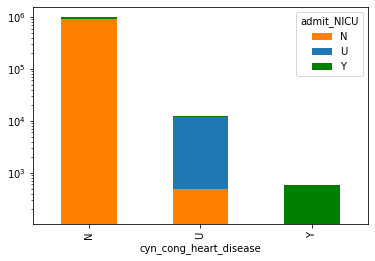

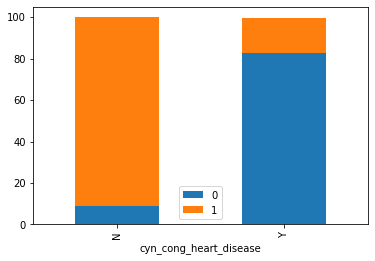

In [73]:
# bmi_plt = births.loc[births['admit_NICU'] != 'U'].groupby(['mother_bmi_recode'])['admit_NICU'].value_counts().unstack()
cchd_plt = totDF.groupby(['cyn_cong_heart_disease'])['admit_NICU'].value_counts().unstack()
cchd_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(hideU(totDF,'cyn_cong_heart_disease'),'cyn_cong_heart_disease')

### anencephaly

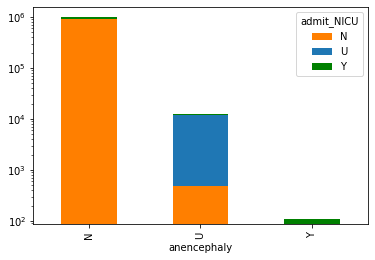

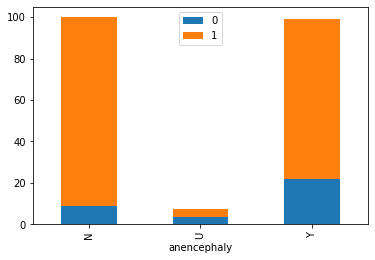

In [39]:
anc_plt = totDF.groupby(['anencephaly'])['admit_NICU'].value_counts().unstack()
anc_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'anencephaly')

### Birth Weight (g)

birth_weight_gm

In [ ]:
totDF['bw_recode'] = pd.cut(totDF['birth_weight_gm'],
                                   [0,499, 999,1499,1999,2499,2999,3499,3999,4499,4999,8200])#, 
                                   #labels = ['u','h','o','ob1','ob2','ob3'])

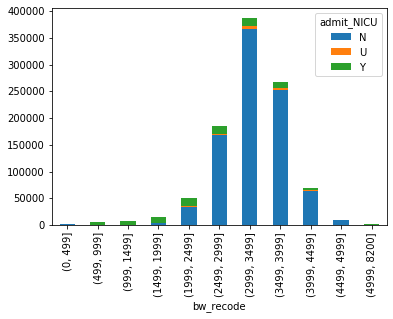

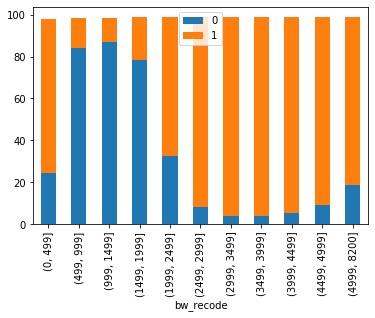

In [42]:
btw_plt = totDF.groupby(['bw_recode'])['admit_NICU'].value_counts().unstack()
btw_plt.plot(kind = 'bar', stacked = True)#,logy=True), color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'bw_recode')

### Gastroschisis

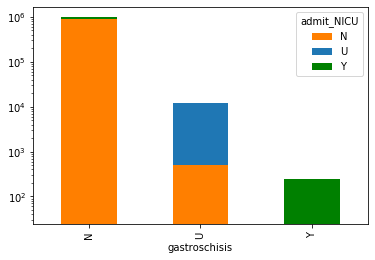

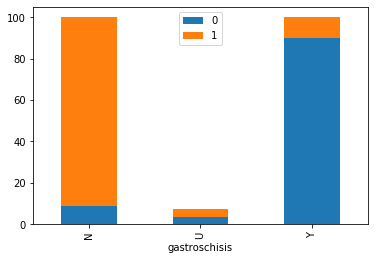

In [45]:
#gastroschisis
gas_plt = totDF.groupby(['gastroschisis'])['admit_NICU'].value_counts().unstack()
gas_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'gastroschisis')

### Down Syndrome

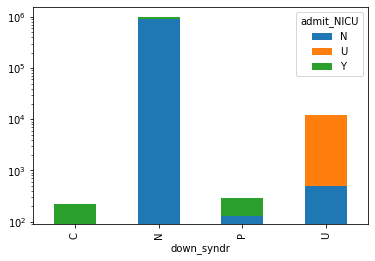

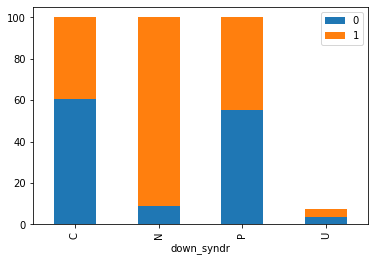

In [47]:
#down_syndr
dwnSy_plt = totDF.groupby(['down_syndr'])['admit_NICU'].value_counts().unstack()
dwnSy_plt.plot(kind = 'bar', stacked = True,logy=True)#, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'down_syndr')

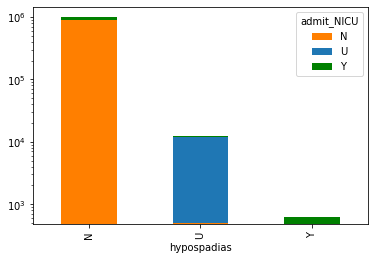

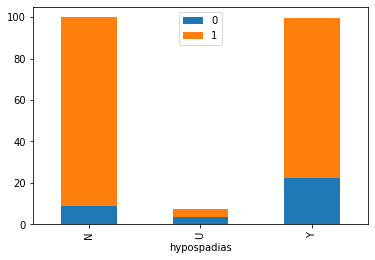

In [49]:
#hypospadias
hypo_plt = totDF.groupby(['hypospadias'])['admit_NICU'].value_counts().unstack()
hypo_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'hypospadias')

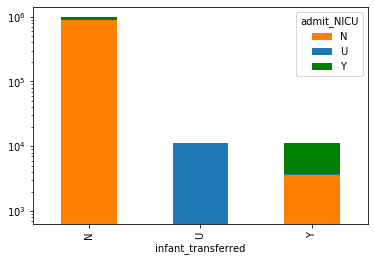

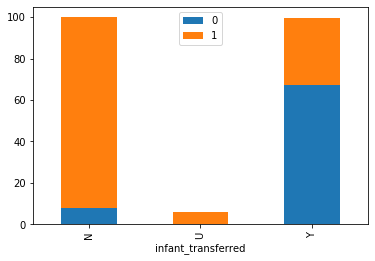

In [51]:
#infant_transferred
infT_plt = totDF.groupby(['infant_transferred'])['admit_NICU'].value_counts().unstack()
infT_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'infant_transferred')

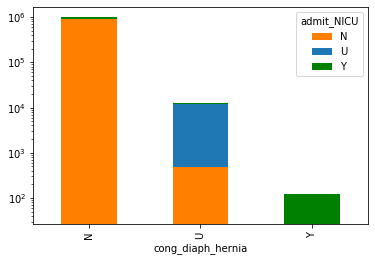

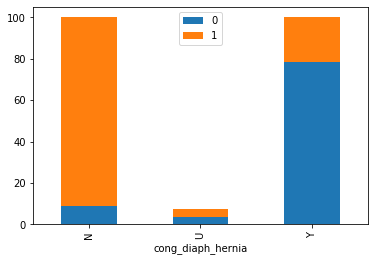

In [52]:
#cong_diaph_hernia
cdh_plt = totDF.groupby(['cong_diaph_hernia'])['admit_NICU'].value_counts().unstack()
cdh_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'cong_diaph_hernia')

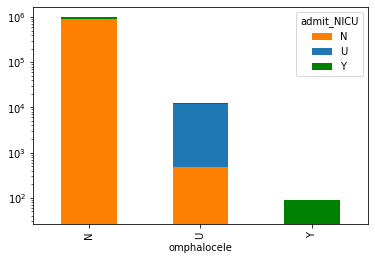

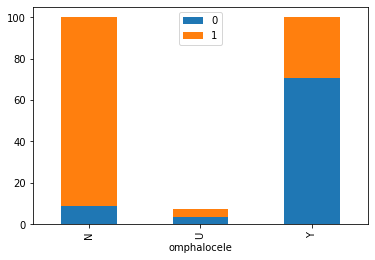

In [53]:
#omphalocele
omp_plt = totDF.groupby(['omphalocele'])['admit_NICU'].value_counts().unstack()
omp_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'omphalocele')

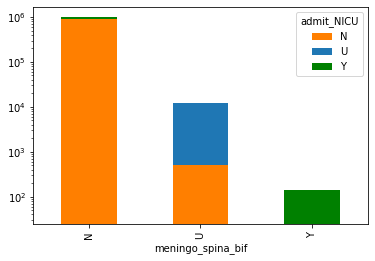

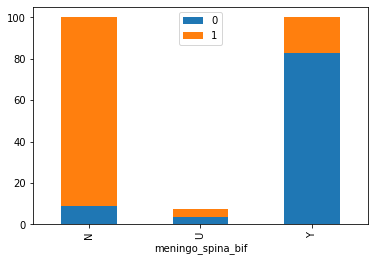

In [54]:
#meningo_spina_bif
msb_plt = totDF.groupby(['meningo_spina_bif'])['admit_NICU'].value_counts().unstack()
msb_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'meningo_spina_bif')

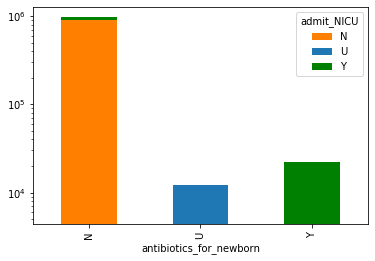

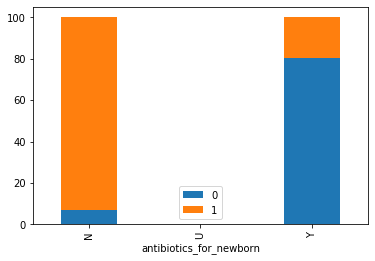

In [55]:
#antibiotics_for_newborn
abio_plt = totDF.groupby(['antibiotics_for_newborn'])['admit_NICU'].value_counts().unstack()
abio_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'antibiotics_for_newborn')

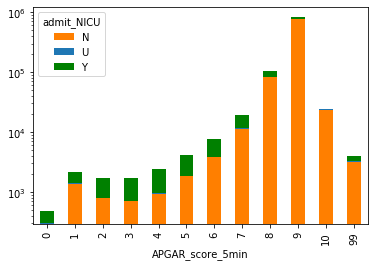

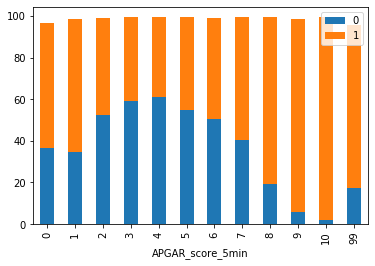

In [58]:
#APGAR_score_5min
apgar5_plt = totDF.groupby(['APGAR_score_5min'])['admit_NICU'].value_counts().unstack()
apgar5_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'APGAR_score_5min')

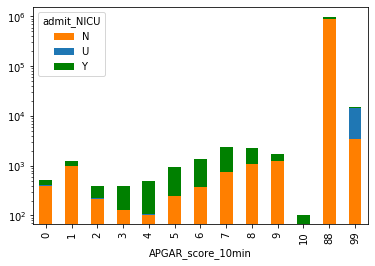

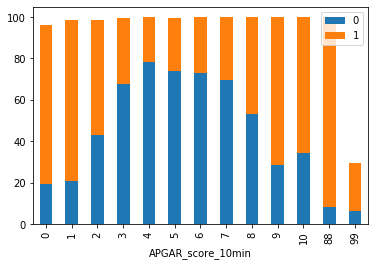

In [59]:
#APGAR_score_10min
apgar10_plt = totDF.groupby(['APGAR_score_10min'])['admit_NICU'].value_counts().unstack()
apgar10_plt.plot(kind = 'bar', stacked = True,logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'APGAR_score_10min')

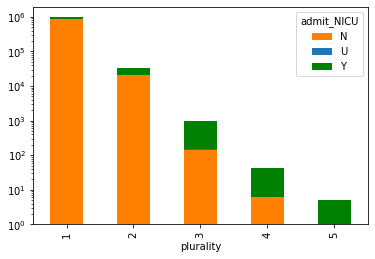

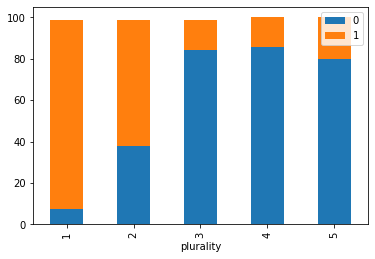

In [64]:
#plurality
plur_plt = totDF.groupby(['plurality'])['admit_NICU'].value_counts().unstack()
plur_plt.plot(kind = 'bar',stacked = True, logy=True, color = ['#ff7f00','#1f77b4','green'])
pct_bplot(totDF,'plurality')

[None, None, None]

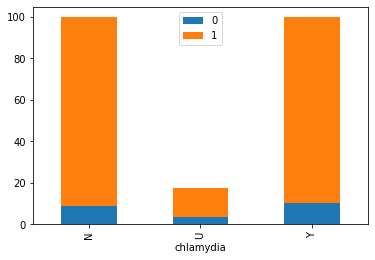

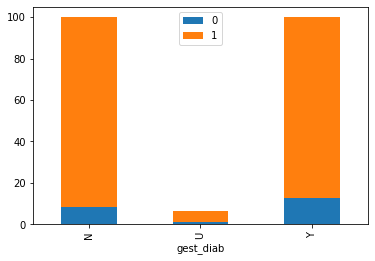

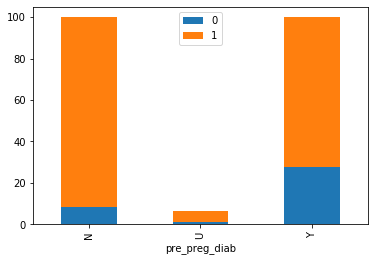

In [84]:
featurePlot(totDF,['chlamydia','gest_diab','pre_preg_diab'])